**Implementation of a Decision Tree Model for Bank Marketing**  
**Task 03**

Develop a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Utilize a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.
Bank Marketing Dataset - https://archive.ics.uci.edu/dataset/222/bank+marketing


In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pydotplus
from IPython.display import Image
from graphviz import Source

In [2]:
# Step 2: Load Dataset
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Step 3: Encode Categorical Features
# Optional: Use get_dummies for better handling of non-ordinal data
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [4]:
# Step 4: Split Data
X = df_encoded.drop('y_yes', axis=1) if 'y_yes' in df_encoded.columns else df_encoded.drop('y', axis=1)
y = df_encoded['y_yes'] if 'y_yes' in df_encoded.columns else LabelEncoder().fit_transform(df_encoded['y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
# Step 5: Train a Tuned Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [6]:
# Step 6: Evaluate the Model
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[772  29]
 [ 75  29]]

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.96      0.94       801
        True       0.50      0.28      0.36       104

    accuracy                           0.89       905
   macro avg       0.71      0.62      0.65       905
weighted avg       0.86      0.89      0.87       905



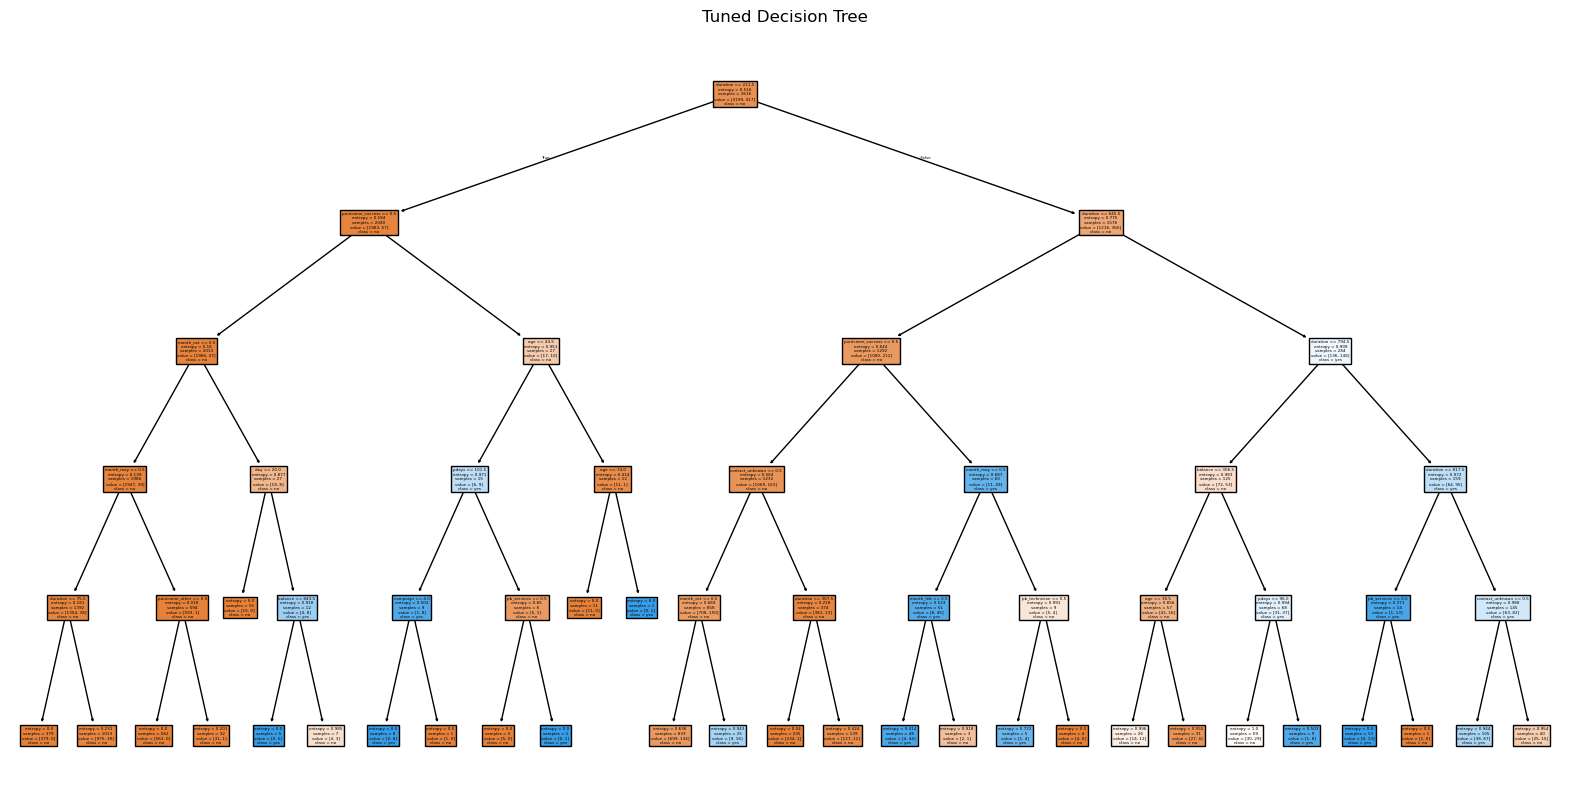

In [7]:
# Step 7: Visualize Tree in Notebook
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['no', 'yes'])
plt.title("Tuned Decision Tree")
plt.show()

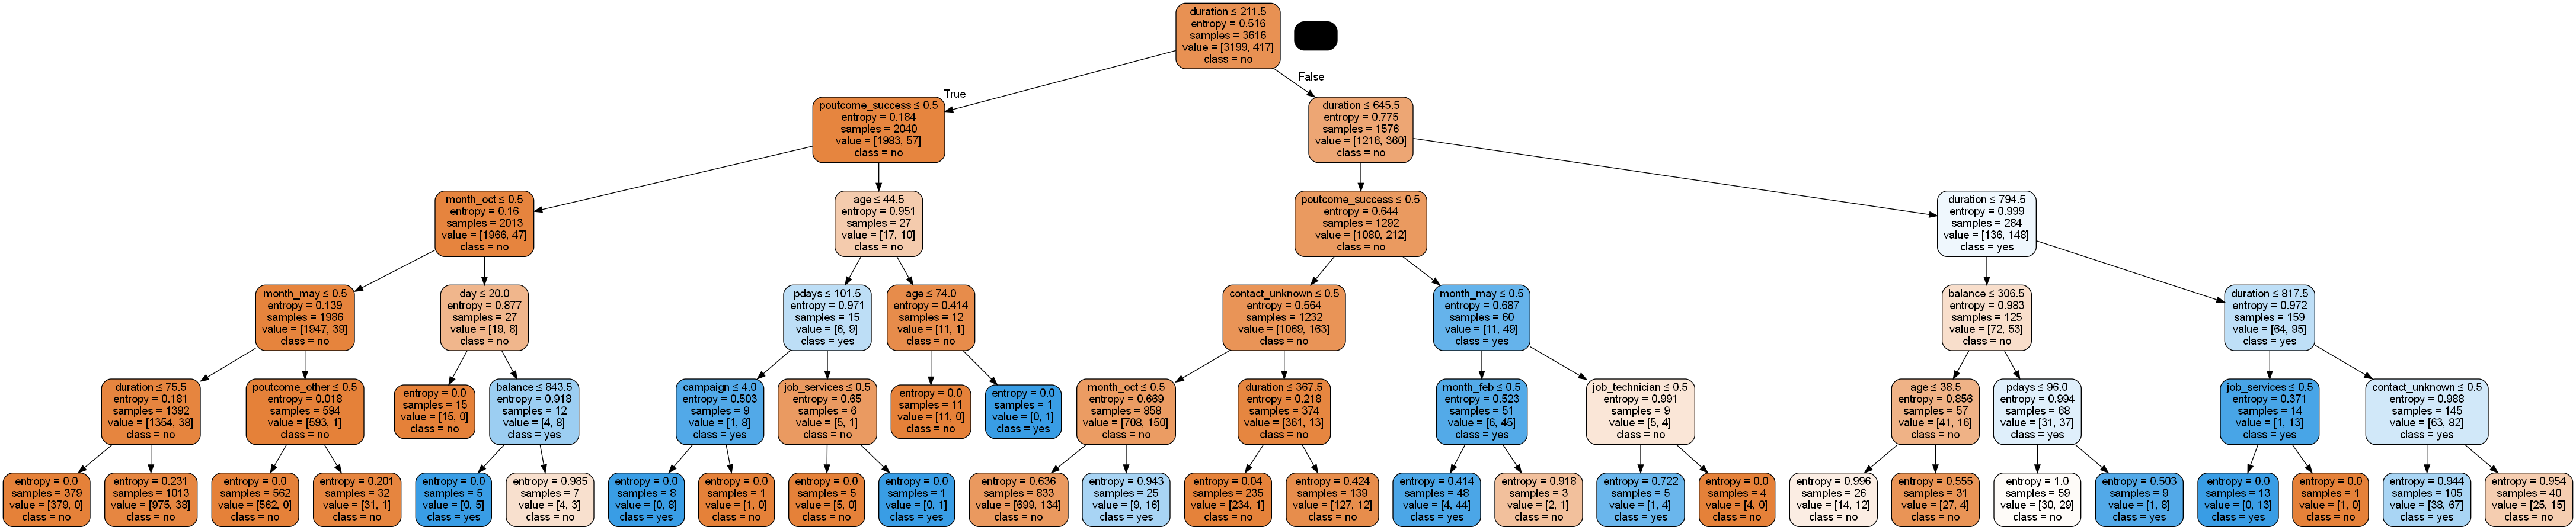

In [8]:
# Step 8: Save the Tree as PNG and PDF
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns,
                           class_names=['no', 'yes'], filled=True,
                           rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
graph.write_pdf("decision_tree.pdf")
Image(graph.create_png())

In [9]:
# Step 9: Export Predictions to CSV
results_df = X_test.copy()
results_df['actual'] = y_test
results_df['predicted'] = y_pred
results_df.to_csv('bank_predictions.csv', index=False)
print("✅ Predictions saved to 'bank_predictions.csv'")

✅ Predictions saved to 'bank_predictions.csv'


In [10]:
# Step 10: Optional - View column descriptions from bank-names.txt
try:
    with open('bank-names.txt', 'r') as file:
        print(file.read())
except FileNotFoundError:
    print("bank-names.txt not found.")

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, GuimarÃ£es, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and SÃ©rgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European

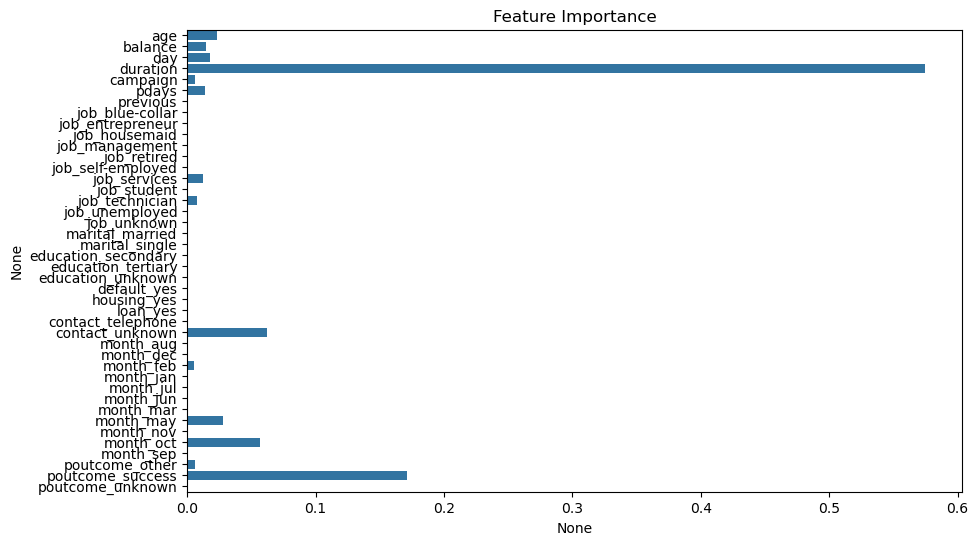

In [11]:
# Optional: Feature Importance Plot
feat_importance = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance")
plt.show()